## Домашнє завдання 7: Статистичний аналіз даних

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [1]:
!pip install statsmodels
!pip install scipy

In [2]:
import math
import random
import re

import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats as st
from scipy.stats import norm

In [3]:
data = pd.read_csv('data.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [5]:
data.shape

(100, 2)

In [6]:
data = data.iloc[:,1]

In [9]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF) нормального розподілу з середнім та стандартним відхиленням як у наших даних.
Цей варіант візуалізації швидший та простіший, ніж той, що наводився у лекції  ми будували кілька кривих щільності для одних і тих самих даних. Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

In [10]:
x_axis = np.arange(data.min(), data.max(), 0.01)


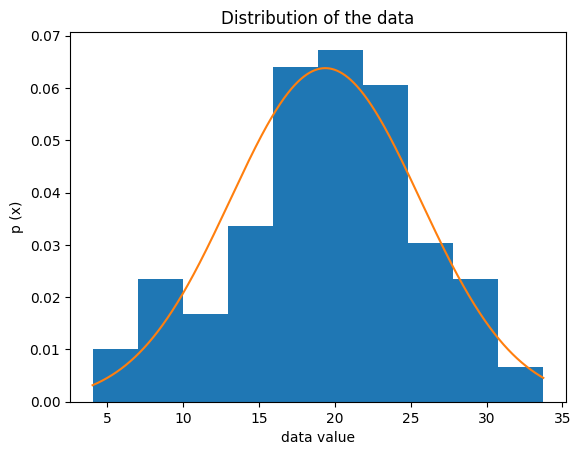

In [11]:
x_axis = np.arange(data.min(), data.max(), 0.01) #Створюємо масив значень з мін до макс з кроком 0.01.
plt.hist(data, bins=10, density=True) #density - щільність в цьому діапазоні в порівнянні з іншими діапазонами
plt.plot(x_axis, norm.pdf(x_axis, data.mean(), data.std()))
plt.title('Distribution of the data');
plt.xlabel('data value'); plt.ylabel('p (x)');
plt.show()

Очікуваний результат:

**На графіку ми бачимо bell curve (дзвіновидну криву), вона є більшою мірою симетричною, викидів практично немає, тому можна вважати цей розподіл нормальним.**

![image-2.png](attachment:image-2.png)

2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік.

Цей графік генерує власну вибірку (sample) ідеалізованого розподілу, з яким ми порівнюємо наші дані, у цьому випадку розподіл Гауса. Дані ідеалізованої вибірки поділяються на групи (наприклад, 5), які називаються квантилями. Кожна точка наших даних поєднується з подібним членом з ідеалізованого розподілу.

Отримані точки будуються як діаграма розсіювання з ідеалізованим значенням на осі абсцис (х) і вибіркою даних на осі ординат (у).

Якщо наша вибірка даних ідеально збігається з ідеалізованою, то це буде виглядати на графіку як лінія точок під кутом 45 градусів від нижнього лівого кута графіка до верхнього правого. Часто на графіку малюють додаткову лінію, щоб допомогти зрозуміти це очікування. Відхилення крапок від лінії очікувань (ідеального варіанту) показує відхилення наших даних від очікуваного розподілу.

Ми можемо розробити діаграму QQ в Python за допомогою функції [statsmodels qqplot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html). Функція бере вибірку даних і за замовчуванням припускає, що ми порівнюємо її з розподілом Гауса. Ми можемо намалювати стандартизовану лінію, встановивши для аргументу `line` значення `s`.

**Ваша задача тут**: вивести qq графік з допомогою зазначеного методу та написати висновок, чи розподіл є нормальним згідно з цим графіку.
Як інтерпретувати QQ графіки - наведено на картинці нижче.

![image.png](attachment:image.png)

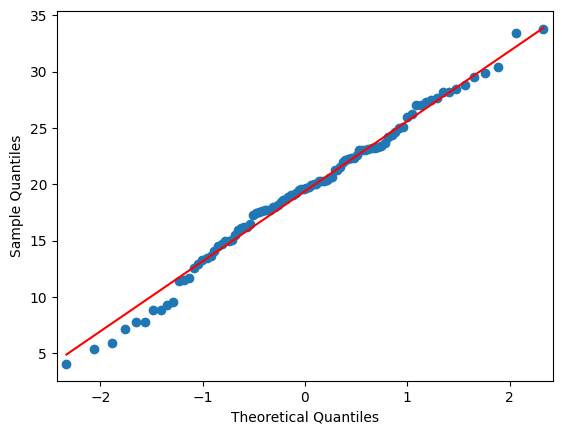

In [12]:
from scipy.stats import shapiro
sm.qqplot(data, line='s')
plt.show()

**Згідно цього графіку розподіл є нормальним, оскільки даних на кінцях лінії менше.**


Очікуваний результат:

![image.png](attachment:image.png)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою тета Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [36]:
import scipy.stats as stats
stat, p_value = stats.shapiro(data)
print("Statistic is", stat)
print("P-value is", p_value)
alpha = 0.05
if p_value < alpha:
    conclusion = "Відхиляємо нульову гіпотезу."
else:
    conclusion = "Не можемо відхилити нульову гіпотезу."
print (conclusion)

Statistic is 0.988785982131958
P-value is 0.5678303241729736
Не можемо відхилити нульову гіпотезу


## Z-test

4.Уявіть, що наші дані - це сума покупок в доларах наших покупців на сайті протягом липня 2022 року.
До цього місяця, ми мали продажі в середньому на чек $20. Чи вийшло у нас статистично значущо **підвищити** середній чек за останній місяць? Виведіть p-значення статистичного тесту та зробіть висновок, чи ми маємо зараз статистично значущу різницю у розмірі середнього чеку.
**Підказка**: треба провести одновибірочний z-test.

In [37]:
from statsmodels.stats.weightstats import ztest
null_mean = 20
alpha = 0.05
ztest_Score, p_value = ztest(data,value = null_mean, alternative='larger')
print("Z test score is", ztest_Score)
print("P-value is", p_value)
if(p_value <  alpha):
  print("We must reject the null hypothesis (we managed to increase the avarage check with statistical significance).")
else:
  print("We cannot reject the null hypothesis (we didn't manage to increase the avarage check with statistical significance).")

Z test score is -0.9953477389335053
P-value is 0.8402164165464012
We cannot reject the null hypothesis (we didn't manage to increase the avarage check with statistical significance).


**Z test score мінусовий, це свідчить про те, що середній чек за липень нижчий ніж до цього місяця. P-value значно вище ніж 0.05, тому ми не можемо спростувати нульову гіпотезу.**

5.Пройшов час, і ми зібрали дані про продажі за серпень 2022 року, які зберігли у файл `data_2.csv`. Продажів було дещо більше, але чи змінився стат. значущо середній чек порівняно з липнем 2022? Перевірте це використовуючи ztest.
Виведіть p-значення статистичного тесту та зробіть висновок, чи ми маємо зараз статистично значущу різницю у розмірі середнього чека між двома місяцями.

**Підказка**: треба провести двовибірковий ztest з Н0 - що середні значення в липні та серпні 2022 року - однакові. Для кращого розуміння ситуації, можливо вам буде цікаво переглянути, які середні показники чеку були в кожен з місяців :) Порівняйте свій висновок з простого спостереження середніх значень і висновок статистичного тесту. Чи вони збігаються?

In [15]:
data2 = pd.read_csv('data_2.csv')

In [16]:
print(f'Середній чек за липень - {np.mean(data)}')
print(f'Середній чек за серпень - {data2["data"].mean()}')


Середній чек за липень - 19.37755319670441
Середній чек за серпень - 19.37322276512519


**Як ми бачимо, незважаючи на те, що продажів було дещо більше, значення середнього чеку залишилось на такому ж рівні, навіть трішки зменшилось.**

In [17]:
null_mean1 = 19.37755319670441
null_mean2 = 19.37322276512519
ztest_Score, p_value = ztest(data, data2, value=0)
print("Z test score is", ztest_Score)
print("P-value is", p_value)

Z test score is [0.00524667]
P-value is [0.99581378]


**Z test score близький до нуля, що показує що різниця середніх значень дуже маленька. P-value велике, це свідчить про те, що ця різниця не є статистично значущою.**

## Аналіз A/B тесту

Маємо проаналізувати дані A/B тесту в популярній [грі Cookie Cats](https://www.facebook.com/cookiecatsgame). Це класична гра-головоломка в стилі «з’єднай три», де гравець повинен з’єднати плитки одного кольору, щоб очистити дошку та виграти рівень. На дошці також зображені співаючі котики :)

Під час проходження гри гравці стикаються з воротами, які змушують їх чекати деякий час, перш ніж вони зможуть прогресувати або зробити покупку в додатку. У цьому блоці завдань ми проаналізуємо результати A/B тесту, коли перші ворота в Cookie Cats було переміщено з рівня 30 на рівень 40. Зокрема, ми проаналізуємо вплив на утримання (retention) гравців. Тобто хочемо зрозуміти чи переміщення воріт на 10 рівнів пізніше якимось чином вплинуло на те, що користувачі перестають грати в гру раніше чи пізніше з точки зору кількості їх днів з моменту встановлення гри.

Будемо працювати з даними з файлу `cookie_cats.csv`. Змінні в даних наступні:

- userid - унікальний номер, який ідентифікує кожного гравця.
- version - чи потрапив гравець в контрольну групу (gate_30 - ворота на 30 рівні) чи тестову групу (gate_40 - ворота на 40 рівні).
- sum_gamerounds - кількість ігрових раундів, зіграних гравцем протягом першого тижня після встановлення
- retention_1 - чи через 1 день після встановлення гравець повернувся і почав грати?
- retention_7 - чи через 7 днів після встановлення гравець повернувся і почав грати?

Коли гравець встановлював гру, його випадковим чином призначали до групи gate_30 або gate_40.

6.Зчитайте дані АВ тесту у змінну `df` та виведіть середнє значення показника показник `retention_7` (утримання на 7 день) по версіям гри. Сформулюйте гіпотезу: яка версія дає краще утримання через 7 днів після встановлення гри?

In [38]:
df = pd.read_csv('cookie_cats.csv')


In [20]:
mean_retention_7 = df.groupby('version')['retention_7'].mean()
print(mean_retention_7)

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


# На основі отриманих даних ми можемо сформулювати наступні гіпотези:
# H0 - утримання на 7 день для версії з воротами на 30-му рівні не відрізняється від утримання для версії з воротами на 40-му рівні;
# H1 - утримання на 7 день для версії з воротами на 30-му рівні вище, ніж для версії з воротами на 40-му рівні.



7.Перевірте з допомогою z-тесту аналогічно до прикладу в лекції, чи дає якась з версій гри кращий показник `retention_7` на рівні значущості 0.05. Обчисліть також довірчі інтервали для двох вибірок. Виведіть результат у форматі:
```
z statistic: ...
p-value: ...
Довірчий інтервал 95% для групи control: [..., ...]
Довірчий інтервал 95% для групи treatment: [..., ...]
```
де замість `...` - обчислені значення. В якості висновка дайте відповідь на два питання:  
    1. чи є статистична значущою різниця між поведінкою користувачів у різних версіях гри?   
    2. чи перетинаються довірчі інтервали утримання користувачів з різних версій гри? Про що це каже?  
    
Зверніть увагу, в такому і схожому завданнях ми використовуєм `proportion` Z-тест. Це тому що в нас залежна змінна має бінарне значення (повернеться аби ні користувач, чи клікне або ні користувач в інших ситуаціях - всього два можливих значення в змінної: 0/1, True/False ). Якщо б ми вимірювали скажімо чи є стат. значущою різниця між вагою чоловіків і жінок в певній вибірці, ми б використовувавли функцію `statsmodels.stats.ztest`, бо залежна змінна `вага` є неперервною (тип float, замість типу int чи bool і тільки двох можливих значень).

In [30]:
control_results = df[df['version'] == 'gate_30']['retention_7']
treatment_results = df[df['version'] == 'gate_40']['retention_7']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'Довірчий інтервал 95% для групи control (gate_30): [{conf_interval_control[0]:.3f}, {conf_interval_control[1]:.3f}]')
print(f'Довірчий інтервал 95% для групи treatment (gate_40): [{conf_interval_treatment[0]:.3f}, {conf_interval_treatment[1]:.3f}]')

z statistic: 3.16
p-value: 0.002
Довірчий інтервал 95% для групи control (gate_30): [0.187, 0.194]
Довірчий інтервал 95% для групи treatment (gate_40): [0.178, 0.186]


# 1. Так поведінка користувачів у різних версіях гри є статистично значущою, про це свідчить p-value, яке нижче 0.05.
# 2. Як ми бачимо, довірчі інтервали не перетинаються. Це ще раз доводить, що різниця між групами gate_30 та gate_40 є статистично значущою.

8.Є ще один тип тестів, який використовується для бінарної метрики як от "зробить юзер дію, чи ні" - тест **Хі-квадрат**. В нього інші гіпотези Н0 і Н1 на відміну від z- та t-тестів. А також цей тест можна використовувати, якщо в нас більше за 2 досліджувані групи, тобто в нас не А/В тест, а А/B/C/D, наприклад.  

В **z- та t-тестах** (які відрізняються тим, що ми в першому не знаємо дисперсію генеральної сукупності, але якщо в нас великий набір даних, то ці два тести дають дуже схожі результати) **ми перевіряємо, чи є різниця у середніх показниках по групам користувачів**.  

А в **тесті Хі-квадрат ми перевіряємо чи є звʼязок між групою користувача і тим, чи він зробить цікаву нам дію**. Це ніби дослідження одного і того самого, але дещо різними способами. Для перевірки, можна виконувати кілька тестів (особливо, якщо один дає якийсь непереконливий результат типу р-значення 0.07 - наче і fail to regect H0 на рівні стат значущості 5%, але цікаво, що скажуть інші тести), тож, зробимо і ми тест хі-квадрат та порівняємо його результат з z-тестом.

Про різницю між тестами можна почитати ще [тут](https://stats.stackexchange.com/a/178860) - це просто пояснення користувача стековерфлоу, але там розумні люди сидять.

Для проведення хі-квадрат тесту скористаємось функцією з `scipy.stats` `chi2_contingency` для обчислення статистики хі-квадрат і р-значення для перевірки конкретної гіпотези. У цю функцію вам треба передати таблицю 2х2: кількість випадків для кожної версії гри і значення `retention_7`.

**Задача**: виконайте тест хі-квадрат на рівні значущості 5% аби визначити, чи є залежність між версією гри та тим, чи зайде гравець на 7ий день після встановлення гри.
Тут гіпотези наступні
- Н0: значення retention_7 не залежить від версії гри
- Н1: є залежність між версією гри і значенням retention_7

Виведіть p-значення та зробіть висновок.


In [35]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['version'], df['retention_7'])

chi2_stat, p_val_new, _, _ = chi2_contingency(contingency_table)

print("P-value -", p_val_new)

P-value - 0.0016005742679058301


**Оскільки p-value менше 0.05 (рівень значущості 5%), ми відхиляємо нульову гіпотезу і приймаємо альтернативну гіпотезу про наявність залежності між версією гри і значенням retention_7.**